# Final Report: Market News Analysis on Bitcoin Pricing Trend
## Project Introduction

>In 2019, the Bitcoin market seems to release a signal of revival from 2018 Bitcoin Crash. We are glad to hear that and want to help people to know about this trend. Our goal is to explore the trend variation on the bitcoin market price based on the market news and online social news.

>We wrote an interactive software to do the ML task and evaluate different classifiers according to their accuracy scoring scores.

>Results: Explanation/Inference from our data analysis.

PS: You could also find our github repository by clicking this [Link](https://github.com/edgeslab/cs418-project-slamming-squad-1/blob/master/Final_Report.ipynb)

In [76]:
!pip install -r ./requirements.txt > pip-log.txt

In [77]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from data_process import *
from eda_sentiment import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1 Data collection
Before our data processing, we used the web crawler scripts to get raw data and saved them as csv files under same directory. Our raw data consists two parts: One is Bitcoin pricing and the other is Bitcoin Media news. We downloaded Bitcoin pricing from Yahoo Finance and use python webcrawler techniques to get our media news data from multiple news websites.
>We collect news data from all popular Bitcoin media websites, like cryptocurrencynews.com, cryptonews.com, ccn.com etc. You could find the web crawl scripts in the root [news_contents_request.py](https://github.com/edgeslab/cs418-project-slamming-squad-1/blob/master/news_contents_request.py)
1. In order to run this script, you need to download [selenium.webdriver](https://www.seleniumhq.org/download/) corresponding to your Browser(like ChromeWebdriver). Please save it in '/usr/local/bin/chromedriver'
2. Install selenium package in your jupyter kernel environment.
3. You can skip below data collection step, because it also depends on the network brandth when you try to crawl the websites. You could use the downloaded data to continue the sentiment analysis. 

In [78]:
# Can skip below commands if you have no internet networking or low speed. This step can cost >=10 mins

# %run -i 'news_contents_request.py' -n 'cryptocurrencynews' -u 'https://cryptocurrencynews.com/daily-news/bitcoin-news/'

# %run -i 'news_contents_request.py' -n 'cryptonews' -u 'https://cryptonews.com/news/bitcoin-news/'

In [79]:
# Read 'Bitcoin' and the pricing of 'Bitcoin' market
priceOfBitcoin = pd.read_csv('bitcoin_price.csv')
curr_newsOfBitcoin = pd.read_csv('cryptocurrencynews.csv')
crypto_newsOfBitcoin = pd.read_csv('cryptonews.csv')
coindesk_newsOfBitcoin = pd.read_csv('coindesk.csv')

## 2 EDA and Data Cleaning
### 2.1 EDA on the raw dataset, we looked into the raw datasets we collected, here are their descriptives:
1. Structure: the raw datasets are structured and stored in CSV files. For pricing dataset, the different price attributes("Open", "High", "Low", "Close" etc) are all quantitative, and also an important attribute "Date" which will be used to join the news dataset. For news dataset, there are only two attributes: news text and date. News texts are strings.
2. Granularity: For pricing dataset, each record represents the statistics of Bitcoin in one transaction day. For news dataset, each record represents one news per transaction day. All records are at same level and fine grained.
3. Scope: Our main goal is to analyze the trend of Bitcoin price, the price dataset contains the "Open" and "Close" price which could allow us to infer the pricing trend(Increasing/Decreasing) the difference "Close" - "Open". 
4. Temporality: Because of the reference restrictions from websites, the price data we collected ranged from Apr-2013 to Apr-2019. The news data ranged from Dec-2017 to Apr-2019.
5. Faithfulness: Both the pricing data and media data are from famous and trustful, hignRanked websites by Google Search Engine.

### 2.2 Date Cleaning
1. Missing data handling in "Volume" attribute, we use mean values to replace them
2. Transformation, from object->numeric, object->str, object->datetime etc
3. Create labels, based on the diff of "close" and "open" price 
4. merge news data with price data based on the "date" key

Preprocess scripts could be found here. [data_process.py](https://github.com/edgeslab/cs418-project-slamming-squad-1/blob/master/data_process.py)

In [80]:
# Date tranformation and adding label in the pricing dataset
priceOfBitcoin = pre_process_price(priceOfBitcoin)
priceOfBitcoin = add_label(priceOfBitcoin)
# Read from cryptocurrencynews.csv
curr_newsOfBitcoin = pre_process_news(curr_newsOfBitcoin)
# Read from cryptonews.csv
crypto_newsOfBitcoin = pre_process_news(crypto_newsOfBitcoin)
# Read from coindesk.csv
coindesk_newsOfBitcoin = pre_process_news(coindesk_newsOfBitcoin)
# combine news_data together
newsOfBitcoin = combine_news(curr_newsOfBitcoin, crypto_newsOfBitcoin, coindesk_newsOfBitcoin)
# merge the dataset with price and news
bitcoin_contents_price = priceOfBitcoin.merge(newsOfBitcoin, how = 'inner', left_on='date', right_on='date')
bitcoin_contents_price.head()

,date,open,High,Low,close,Volume,Market Cap,diff,label,label_descriptive,text
0,2019-04-26,5210.30,5383.63,5177.37,5279.35,1.681211e+10,9.327229e+10,69.05,1,Uprising,The past two sessions saw a lot of volatility...
1,2019-04-25,5466.52,5542.24,5181.34,5210.52,1.533028e+10,9.204649e+10,-256.00,0,Decreasing,"Recently, bitcoin price started a downside co..."
2,2019-04-25,5466.52,5542.24,5181.34,5210.52,1.533028e+10,9.204649e+10,-256.00,0,Decreasing,"Bitcoin (BTC) may revisit sub-$5,000 levels i..."
3,2019-04-24,5571.51,5642.04,5418.26,5464.87,1.704803e+10,9.653004e+10,-106.64,0,Decreasing,Entrepreneur and Bitcoin bull John McAfee say...
4,2019-04-24,5571.51,5642.04,5418.26,5464.87,1.704803e+10,9.653004e+10,-106.64,0,Decreasing,Specialist blockchain and artificial intellig...


In [81]:
# we save our dataframe to local CSV files for later Machine Learning Toning use
saved_df = bitcoin_contents_price[['label', 'text']]
saved_df.to_csv('bitcoin_contents_price.csv', sep=',', index = False)

In [82]:
bitcoin_contents_price.to_csv('all_bitcoin_contents_price.csv', sep=',', index = False)

### 3 Visulization
Visualization part help us to do better data cleaning. This task is always the most important part in our project till the end.
>Part1: Price Visualization
1. Use scatterplot to visualize the correlation between open and close price. We find that the relation between these two attributes is nearly linear. It tells that in the low price part, the variation is slight. While in the high price part, the fluctuation is noticable. 
2. We use lmplot to visualize the open and close price with the relationship with pricing trend.
After visualization, we thought that "open" and "close" seems to better satisfy our needs.

>Part2: Feature and Lexion Visualization
1. We would take use of [Afinn Lexion](https://www.kdnuggets.com/2018/08/emotion-sentiment-analysis-practitioners-guide-nlp-5.html) and other visualization methods to help us analyze the sentiment in the news contents.
    [Affin Script](https://github.com/edgeslab/cs418-project-slamming-squad-1/blob/master/eda_afinn.py)
Based on affin sentiment score, we could find the sentiment attitude containing in the news article contents. The distribution of these sentiment under each label(1: rising price, 0: decreasing price) could help to specify some correlationship between the news article and the price trend.
2. TBD


In [83]:
std_priceOfBitcoin = price_standardize(priceOfBitcoin)

Text(0.5, 1.0, 'The relationship between different attributes over date')

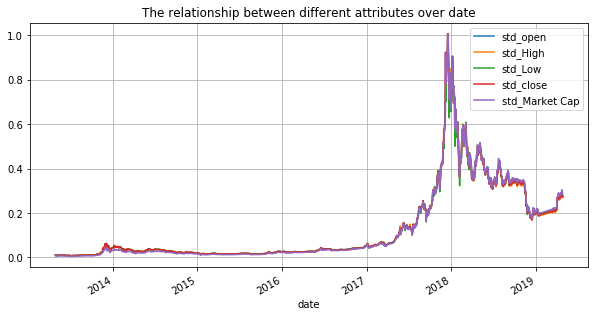

In [84]:
gx = std_priceOfBitcoin.plot(x='date', y=['std_open', 'std_High', 'std_Low', 'std_close', 'std_Market Cap'], 
                             figsize=(10,5), grid=True)
gx.set_title('The relationship between different attributes over date')

Text(0.5, 1.0, 'Scatterplot of standardized open and close price')

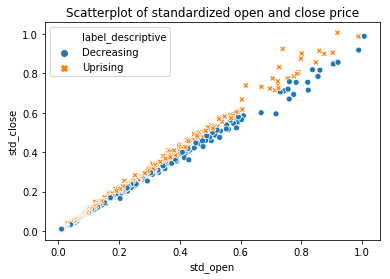

In [85]:
ax = sns.scatterplot(x="std_open", y="std_close", hue='label_descriptive', style='label_descriptive', data=std_priceOfBitcoin)
ax.set_title('Scatterplot of standardized open and close price')

/Users/dahang/anaconda3/envs/cs418env/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


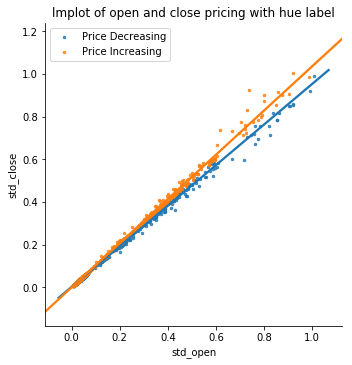

In [86]:
fag = sns.lmplot(x='std_open', y='std_close', hue='label_descriptive', data=std_priceOfBitcoin, 
                scatter_kws={'s': 6}, legend_out=False)
fag.ax.set_title("lmplot of open and close pricing with hue label")
leg = fag.axes[0, 0].get_legend()
leg.set_title(None)
labs = leg.texts
labs[0].set_text('Price Decreasing')
labs[1].set_text('Price Increasing')

      sentiment_score                                                  
                count      mean        std    min  25%  50%   75%   max
label                                                                  
0               508.0  8.122047  17.042031 -123.0 -2.0  7.0  18.0  86.0
1               568.0  9.505282  14.748209  -68.0  1.0  9.0  18.0  83.0


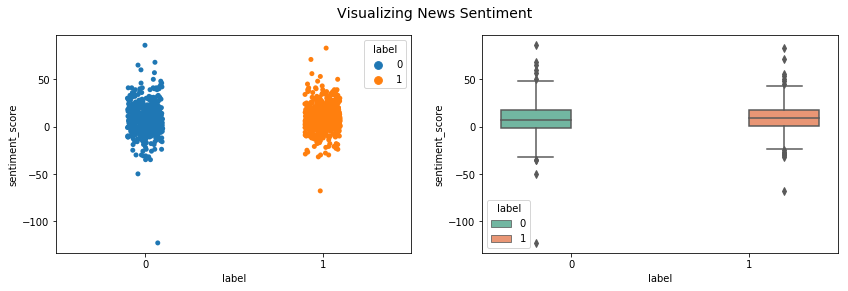

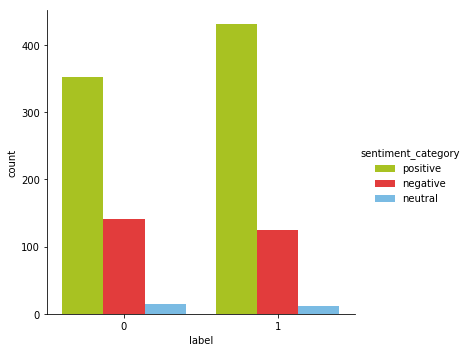

In [87]:
afinn_df = afinn_analysis(bitcoin_contents_price)

#### 3.1 Initial Hypothesis/Estimation
>From above sentiment analysis, we could find that when the Bitcoin price is going up, more positive sentiment attitude to Bitcoin appears in the media contents. We believe that there is high probability or correlation between those media news and Bitcoin pricing variations

>Caveats: We know that there are a lot of coincidence and other factors that might cause the Bitcoin price to change. This is only the view from media news we try to specify to Bitcoin investors. If you are one of the investors, there are a lot of other factors that you might to consider when you make a investment decision.

### 4 ML Analysis

Currently we have a dataset with 317 data points. Each data point contains the news title and the cryptocurrency price change for the day (0 or dump 1 for pump). We don’t have a big enough dataset yet. So currently we only have a training set (80%) and a test set (20%) without the validation set. 

In order to use this dataset with machine learning, we made a nice machine learning software named “Machine Learning with Text Data” (https://github.com/edgeslab/cs418-project-slamming-squad-1/tree/master/ML_TEXT ). It has a GUI built using PyQt5 and handles most major machine learning classifiers (SVM, Neural Network, kNN, etc.) Hyperparameters can be tuned inside the software. Its core function uses all techniques we learned in the class and homework about text data handling. It is tested with the tweets train data in our homework. 

We feed our dataset to the software. We tried several types of classifiers and tuned some hyperparameters. We don’t want to use the test set too many times. So, we didn’t try all hyperparameters to avoid overfitting. Currently the best result we get is using polynomial SVM, which gives us 10-Fold Cross validation score of 0.597, and the test score is 0.703. Considering the data set is relatively small, this is a promising result. In the future, we will extend the size of our dataset, and also use each news content instead of title. We expect even better test score. 

The software will have function build-in to predict the price changing trend by feeding one(or more) news data. By then we will have the complete train-evaluate-test-predict machine learning process. 

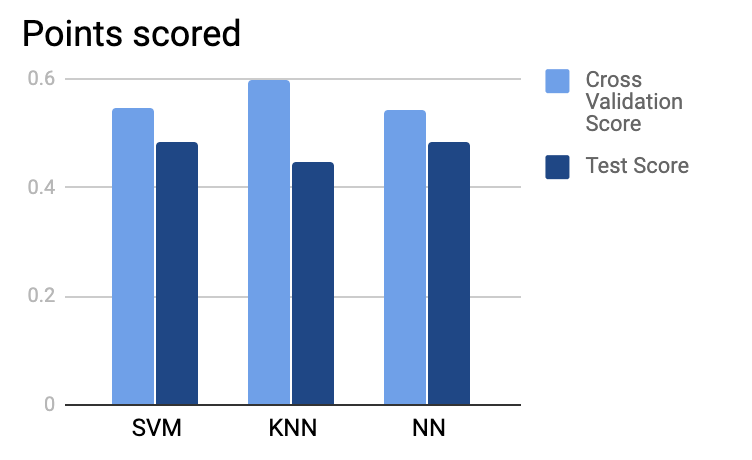

In [2]:
from IPython.display import Image
Image(filename='2.png')

### 5 Reflection: a discussion of the following:
o What is hardest part of the project that you’ve encountered so far?

We have encountered some challenges before. The biggest challenge is about how to collect data from various data resources and to clean the data. We first tried to find some APIs and download news data in a good format. But all cryptocurrency news websites 
do not provide such kind of API. And then we try to find some news search engine APIs. Unfortunately, news search engine like Google news doesn't
have such API. Other news API like https://newsapi.org/ can only crawl new data for one recent month. So we have to crawl raw data and do data cleaning 
about them which turns out to be very tedious and challenging.   

o What are your initial insights?

Our goal is to explore the change of bitcoin market price and news from various online sources. We plot the bitcoin prices and the counts of 
occurrences about bitcoin in social media. We found high correlation between them.


o Are there any concrete results you can show at this point? If not, why not? o Going forward, what are the current biggest problems you’re facing?


We have gathered files of bitcoin price and crawled news data from one website and did data cleaning to the raw news data.
Several training models have been built and integrated into one plateform with a UI that makes it easier use. 

The current biggest problem we have is to crawl larger size of data set as well as doing data cleaning about them and building models to train them.


o Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?

Yes. We are now on the track. We now have data and basic models. We need to crawl more data and modify our model. We should finish the project as we scheduled
before.



o Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it’s better than your current results?

Yes. Explore the correlation between bitcoin price and related news is very interesting. We now find the high correlation about them.
We hope to build one model that can predict the change of bitcoin price well in the future.


#### Next steps: 
We are still far more to go. Firstly for the data part, we have the data of Bitcoin and the related news collected until the last month.  This will be put into our model for training and testing. After our model is completely finished and optimized, we will collect the latest  Bitcoin news to make the prediction on its possible price change.

For the data processing part, since we compare the next day’s Bitcoin price with the previous day’s to label it as a signal for Increasing or decreasing, of course this is too simple and the Bitcoin market may not respond so quickly to the news or it may respond too quickly to catch its correlations. We shall come up with some other ideas to make it as a good Label.

One more thing worth to comment here is that some of the Bitcoins news are written after the market massive move and they try to dig into the reasons for the Bitcoin pump or dump. We must take care of such kind of news too. 

And so far we are still building the model to train and test our collected data set. We tried our model only on the Head of news because it is simple to deal with and it is easy to process, so that we can get a quick feedback and to further revise  our model. We shall continue to try it on other different supervised machine learning models, say  Decision Trees, and Random forest, and AdaBoost classifiers, until we choose the best classifier. 
For the next step we will apply it on the large amount of  news’ main content, and from which we shall complete our model training and further test. And eventually to make some meaningful predictions.